## EE P 596: Advanced Introduction to Machine Learning
    
## Programming Assignment 1: Linear Regression

## Due  January 14th, 2023 by 11:59 PM
### <span style="color: red">Student: Naif A Ganadily</span>
<br>

## Instructor - Prof. Karthik Mohan <br>
## TA - Ayush Singh <br>
## Grader - Fatwir SM <br> <br> 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV

# What I added:
# StandardScaler from documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## SETUP 1

In [2]:
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))


# Return it in the format of a pandas dataframe.
def dataset_loader():
  df = pd.read_csv('cellphones_data.csv')
  return df
  

# For the given dataset, print the first 10 lines.
def starting_printer(df):
  return df.head(10)

df = dataset_loader()
display(df)
display(starting_printer(df))

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,12/05/2021
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,23/03/2022
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022


,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,12/05/2021
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,23/03/2022
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022


In [3]:
# I am changing some of the comlumn headers from 'word word' to 'word_word' due to be able to call them when needed
df.columns = ['cellphone_id', 'brand', 'model', 'operating_system', 'internal_memory', 'ram', 'performance', 'main_camera', 'selfie_camera', 'battery_size', 'screen_size', 'weight', 'price', 'release_date']

In [4]:
# Checking to see if it worked which apparently it did!
display(starting_printer(df))

,cellphone_id,brand,model,operating_system,internal_memory,ram,performance,main_camera,selfie_camera,battery_size,screen_size,weight,price,release_date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,12/05/2021
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,23/03/2022
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022


In [5]:
# Checking to see which attributes are Categorical Data and Numerical Data
def get_column_types(df):
  # Get data types of columns
  column_types = df.dtypes

  # Separate numerical and categorical columns
  # numerical_columns anything which is not an 'object' using !=
  # categorical_columns anything which is an 'object' using ==
  numerical_columns = column_types[column_types != 'object'].index
  categorical_columns = column_types[column_types == 'object'].index

  return numerical_columns, categorical_columns

numerical_columns, categorical_columns = get_column_types(df)
print(f'Numerical columns: {numerical_columns}')
print(f'Categorical columns: {categorical_columns}')

Numerical columns: Index(['cellphone_id', 'internal_memory', 'ram', 'performance', 'main_camera',
       'selfie_camera', 'battery_size', 'screen_size', 'weight', 'price'],
      dtype='object')
Categorical columns: Index(['brand', 'model', 'operating_system', 'release_date'], dtype='object')


From this we can conclude that the only Categorical Data in the Dataframe are ['brand', 'model', 'operating_system'] I dont think we can consider ['release_date'] to be a categorical data due to it being in a dd/mm/yyyy format 

In [6]:
# After checking we found out that the only Categorical Data in the Dataframe are ['brand', 'model', 'operating_system']
# We create a new dataframe df1 for the new dummy attributes

def categorization(df):
  df = pd.get_dummies(df, columns=['brand', 'model', 'operating_system'])
  return df



# Print out first few rows of these dummy attributes.
categorization(df).head(3)

,cellphone_id,internal_memory,ram,performance,main_camera,selfie_camera,battery_size,screen_size,weight,price,...,model_Xperia Pro,model_Zenfone 8,model_iPhone 13,model_iPhone 13 Mini,model_iPhone 13 Pro,model_iPhone 13 Pro Max,model_iPhone SE (2022),model_iPhone XR,operating_system_Android,operating_system_iOS
0,0,128,4,7.23,12,7,2018,4.7,144,429,...,0,0,0,0,0,0,1,0,0,1
1,1,128,4,7.72,12,12,2438,5.4,141,699,...,0,0,0,1,0,0,0,0,0,1
2,2,128,4,7.75,12,12,3240,6.1,174,699,...,0,0,1,0,0,0,0,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9ad1a4f70>,
      dtype=object)

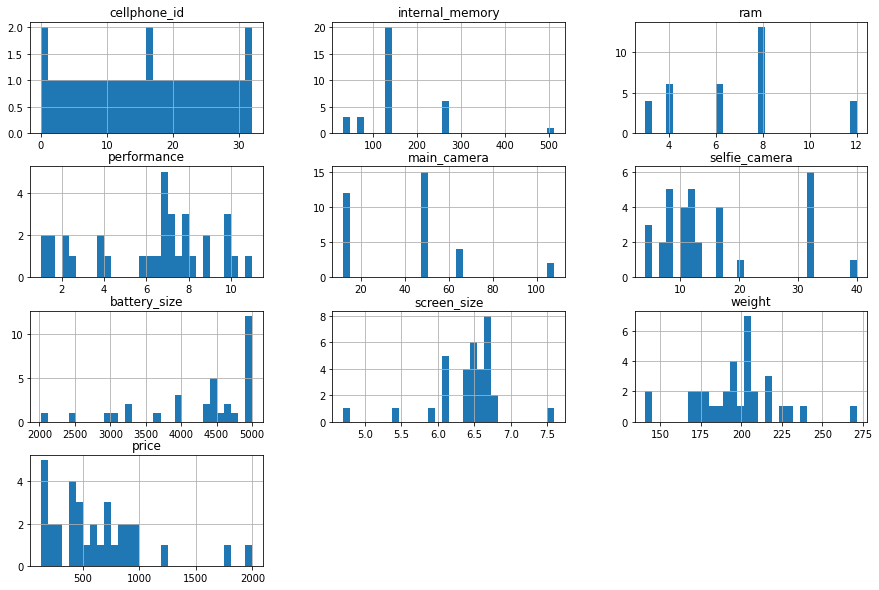

In [7]:
# For any numerical feature in the dataframe, plot a histogram to show its distribution.
# We found out the numerical data are ['internal_memory', 'ram', 'performance', 'main_camera', 'selfie_camera', 'battery_size', 'screen_size', 'weight', 'price', 'release_date']
# df.hist() will automatically show us all the numerical data into histograms leaving out the categorical ones from the original Dataframe (df)

def plot_hist(df):
  return df

plot_hist(df).hist(bins=30, figsize=(15, 10))


## SETUP 2
Reference - https://plainenglish.io/blog/how-to-run-vs-code-server-with-google-colab-2f902d8fa4f5 <br>
Run the following in Google Colab.

In [8]:
%pip install colabcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 KB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.0/347.0 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.2/273.2 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB

In [9]:
from colabcode import ColabCode

In [10]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar -xvzf ngrok-v3-stable-linux-amd64.tgz
!ngrok authtoken 2Jy4tWV8rV7nNJiRc6q9yhzJB7C_2RJNyB1V8KAEQ26e3aDVG
# Replace YOUR_AUTH_TOKEN with the auth token generated by ngrok.

--2023-01-15 03:14:11--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300212 (8.9M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.tgz’

ngrok-v3-stable-lin 100%[===================>]   8.87M  43.9MB/s    in 0.2s    

2023-01-15 03:14:11 (43.9 MB/s) - ‘ngrok-v3-stable-linux-amd64.tgz’ saved [9300212/9300212]

ngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [11]:
ColabCode(port=10000, password='mypassword', mount_drive=True)

Code Server can be accessed on: NgrokTunnel: "https://3f9a-34-148-217-96.ngrok.io" -> "http://localhost:10000"
Mounted at /content/drive
[2023-01-15T03:15:04.306Z] info  code-server 3.10.2 387b12ef4ca404ffd39d84834e1f0776e9e3c005
[2023-01-15T03:15:04.307Z] info  Using user-data-dir ~/.local/share/code-server
[2023-01-15T03:15:04.317Z] info  Using config file ~/.config/code-server/config.yaml
[2023-01-15T03:15:04.317Z] info  HTTP server listening on http://127.0.0.1:10000 
[2023-01-15T03:15:04.317Z] info    - Authentication is enabled
[2023-01-15T03:15:04.317Z] info      - Using password from $PASSWORD
[2023-01-15T03:15:04.318Z] info    - Not serving HTTPS 


KeyboardInterrupt: ignored

## Housing Prices Dataset

In [12]:
# Loading the datasets.
train = pd.read_csv('train-2.csv')
test = pd.read_csv('test_data_with_target-1.csv')

In [13]:
# Return the number of attributes and the number of data points in the training data.
def dataset_counter(df):
  attributes = df.shape[1]
  data_points = df.shape[0]
  return (attributes, data_points)
print(dataset_counter(train))
print(dataset_counter(test))

(81, 1460)
(81, 1459)


train dataset = (Columns, Rows) = (81, 1460)

test dataset = (Columns, Rows) = (81, 1459)

In [14]:
# Finding Out which features are highly correlated and which ones are weakly correlated 
numerical_cols1 = train.select_dtypes(include=[np.number])
numerical_cols2 = test.select_dtypes(include=[np.number])

corr1 = numerical_cols1.corr()
corr2 = numerical_cols2.corr()

print('The Most Correlated Features For Train Dataset with SalePrice:')
print(corr1['SalePrice'].sort_values(ascending=False)[:10])

print('The Most Uncorrelated Features For Test Dataset with SalePrice:')
print(corr1['SalePrice'].sort_values(ascending=False)[-10:])

print('The Most Correlated Features with For Train Dataset SalePrice:')
print(corr2['SalePrice'].sort_values(ascending=False)[:10])

print('The Most Uncorrelated Features with For Test Dataset SalePrice:')
print(corr2['SalePrice'].sort_values(ascending=False)[-10:])

The Most Correlated Features For Train Dataset with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
The Most Uncorrelated Features For Test Dataset with SalePrice:
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
The Most Correlated Features with For Train Dataset SalePrice:
SalePrice       1.000000
OverallQual     0.831045
GrLivArea       0.741442
GarageCars      0.689866
GarageArea      0.687726
TotalBsmtSF     0.683201
1stFlrSF        0.668450
YearBuilt       0.605285
GarageYrBlt     0.573674
YearRemodAd

In [15]:
def pre_process(df):
# Add all preprocessing required in the dataset.
# HINT - You might have to process categorical and numerical variables in different ways, is there any automated way to find
# list of features which are categorical or numerical?


  
  categorical_features = df.select_dtypes(include=['object']).columns
  numerical_features = df.select_dtypes(exclude=['object']).columns
  
  # One-hot encode categorical columns
  df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
  return df

train1 = pre_process(train)
print(train1.shape)

(1460, 290)


In [16]:
test1 = pre_process(test)
print(test1.shape)

(1459, 272)


In [17]:
def missing_data_fix(df):
# Fix how to handle missing data.

# Replacing all numerical NaN with a mean of all other numerical datapoints
  df.fillna(df.mean(), inplace=True)

# Replacing all categorical with NaN with a mode of all other categorical datapoints
  for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)
  return df


In [18]:
missing_data_fix(train1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [19]:
missing_data_fix(test1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
# Find the intersection of the columns in train1 and test1
common_cols = set(train1.columns).intersection(set(test1.columns))

# Remove columns that are not in the intersection
train1 = train1.loc[:, common_cols]
test1 = test1.loc[:, common_cols]

In [21]:
print(train1.shape)
print(test1.shape)

(1460, 272)
(1459, 272)


In [23]:
def train_LR(df):
  X = df.drop('SalePrice', axis=1)
  y = df['SalePrice']
  LR = LinearRegression()
  LR.fit(X, y)
  return LR

model = train_LR(train1)

In [24]:
from sklearn.metrics import r2_score
def test_LR(df):
# Calulate metrics on the training dataset.
  X = df.drop('SalePrice', axis=1)
  y = df['SalePrice']
  LR = LinearRegression()
  LR.fit(X, y)
  y_pred = LR.predict(X)
  rmse = np.sqrt(mean_squared_error(y, y_pred))
  print("Root Mean Squared Error: ", rmse)
  r2 = r2_score(y, y_pred)
  print("R-squared: ", r2)



In [25]:
test_LR(train1)

Root Mean Squared Error:  22851.50521615243
R-squared:  0.9172017131100771


In [26]:
test_LR(test1)

Root Mean Squared Error:  11794.50828642643
R-squared:  0.9761939720864488


In [27]:
from sklearn.linear_model import LassoCV
def train_LR_reg(df):
  X = df.drop('SalePrice', axis=1)
  y = df['SalePrice']
  model = LassoCV(max_iter=10000, tol=0.0001)
  model.fit(X, y)
  return model

train_LR_reg(train1)

LassoCV(max_iter=10000)

In [28]:
def find_imp_features(model, X):
# print the 10 most important attributes/features that seem to have a big impact on the prediction of the sale price.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# The coef_ contain the coefficients for the prediction of each of the targets

  feature_imp = abs(model.coef_)
  feature_imp = 100.0 * (feature_imp / feature_imp.max())
  sorted_idx = np.argsort(feature_imp)
  important_features = X.columns[sorted_idx[-10:]]
  print("10 Most Important Features: ", important_features)

find_imp_features(model, train1)


10 Most Important Features:  Index(['Condition1_Feedr', 'RoofStyle_Shed', 'Condition1_PosA',
       'Exterior1st_AsbShng', 'GarageQual_TA', 'CentralAir_Y',
       'LotConfig_CulDSac', 'LandContour_Bnk', 'RoofMatl_WdShngl',
       'BsmtCond_TA'],
      dtype='object')


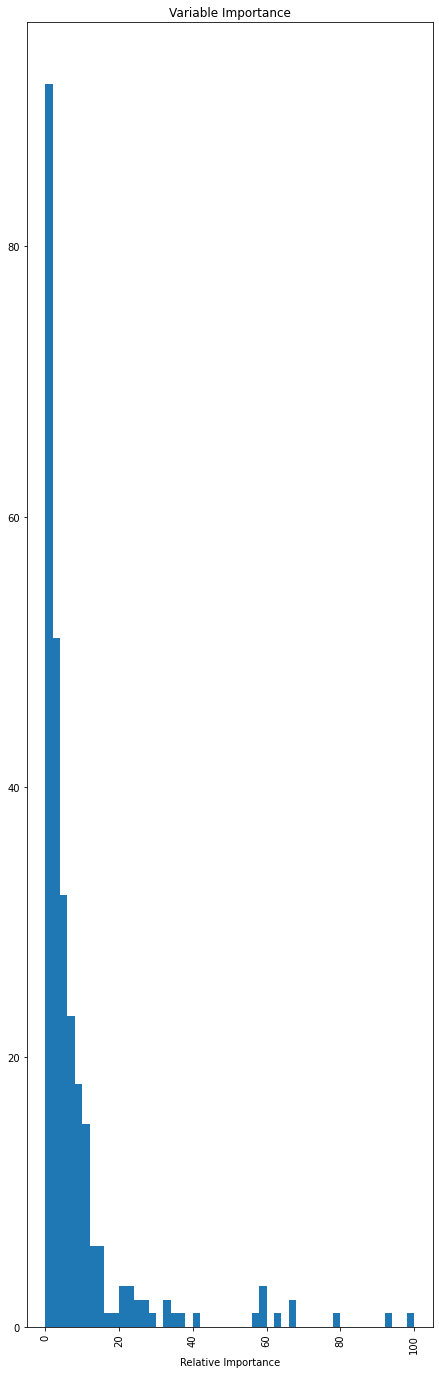

In [29]:
def plot_weights(model):
    feature_imp = abs(model.coef_)
    feature_imp = 100.0 * (feature_imp / feature_imp.max())
    sorted_idx = np.argsort(feature_imp)
    plt.figure(figsize=(16, 24))
    plt.subplot(1, 2, 2)
    plt.hist(feature_imp[sorted_idx], bins=50)
    plt.xticks(rotation=90)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

plot_weights(model)  

In [30]:
# Check the number of features in the Test and Model
print("Test features:", test1.shape[1])

# Check the number of features expected by the model
print("Model expected number of features:", model.coef_.shape[0])

Test features: 272
Model expected number of features: 271


In [31]:
test1 = test1.drop(columns=["SalePrice"])

In [32]:
test_proc = test1
test = test

def acc_tester(model, test, test_proc):

  


#'''
#Arguments:
#model - The traing linear regression model.
#test - The test dataset.
#test_proc - The pre-processed test dataset.
#Be sure that the test dataset is preprocessed similar to the train dataset.
#Returns:
#Result of test
#'''

# Taking 20 rows at random from the test dataset.
  y_pred = model.predict(test_proc[0:20]) # Getting predictions
  if np.sqrt(mean_squared_error(test['SalePrice'].to_numpy()[0:20], y_pred)) < 50000:
    return "Test case passed!"
  else:
    return "Please retry, your model may need corrections!"

acc_tester(model, test, test_proc)

'Test case passed!'